# Light example: 



In [17]:
# imports
import os
import matplotlib.pyplot as plt
from pylab import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from IPython.display import display,HTML

In [33]:
# create influence diagram
diag = gum.InfluenceDiagram()

# structure

chance, test, decision and utility variables

Lamp1: 
- normal behavior is light 1 is on 


HealthLamp1: 
- models if light is healthy 
- If HealthLampL1 indicates it's broken light 1 should be off. 

In [34]:
# Lamp1 and HealthLamp1
Lamp1 = diag.addChanceNode(gum.LabelizedVariable('Lamp1', 'Lamp 1 component', ["on", "off"]))
HealthLamp1 = diag.addChanceNode(gum.LabelizedVariable('HealthLamp1', 'Lamp 1 health', ["ok", "broken"]))

# Lamp1 is conditionally dependent on health
diag.addArc(HealthLamp1, Lamp1)

Visual Inspection: Observation
- decision variable to determine if inspection will be performed
- values are yes / no

Observation Visual Inspection
- models result of visual inspection


In [35]:
inspection = diag.addDecisionNode(gum.LabelizedVariable('inspection', 'visual inspection', ["yes", "no"]))
resultinspection = diag.addChanceNode(gum.LabelizedVariable('resultinspection', 'result inspection', ["not done", "ok", "broken"]))

In [36]:
diag.addArc(HealthLamp1, resultinspection)
diag.addArc(inspection, resultinspection)

measure
- decision variable to determine measurement
- values are yes / no

resultmeasurement
- chance variable resultmeasurementtest 2 result models outcome of test 2: OK, not OK
- not done is also an option if DT2 set to no


In [37]:
measure = diag.addDecisionNode(gum.LabelizedVariable('measure', 'measurement', ["yes", "no"]))
resultmeasurement = diag.addChanceNode(gum.LabelizedVariable('resultmeasurement', 'result measurement', ["not done", "ok", "broken"]))

In [38]:
diag.addArc(HealthLamp1, resultmeasurement)
diag.addArc(measure, resultmeasurement)


what to test?
- decision to determine which test to perform

utilitytests
- helps to determine the right test

In [39]:
whattotest = diag.addDecisionNode(gum.LabelizedVariable('whattotest', 'which test', ["measure", "inspect", "none"]))
u_test = diag.addUtilityNode(gum.LabelizedVariable("u_test", "R(whattotest, HealthLamp1)", 1))

In [40]:
diag.addArc(HealthLamp1, u_test)
diag.addArc(whattotest, u_test)
diag.addArc(whattotest, inspection)
diag.addArc(whattotest, measure)

replace lamp
- when health and results of tests indicate it's necessary

u_replace
- helps to determine when to replace

In [42]:
replacelamp = diag.addDecisionNode(gum.LabelizedVariable('replacelamp', 'replace or not', ["replace", "keep"]))
u_replace = diag.addUtilityNode(gum.LabelizedVariable("u_replace", "R(replacelamp, HealthLamp1)", 1))

In [43]:
diag.addArc(replacelamp, u_replace)
diag.addArc(HealthLamp1, u_replace)
diag.addArc(resultinspection, replacelamp)
diag.addArc(resultmeasurement, replacelamp)

Influence Diagram{
  chance: 4,
  utility: 2,
  decision: 4,
  arcs: 13,
  domainSize: 864
}


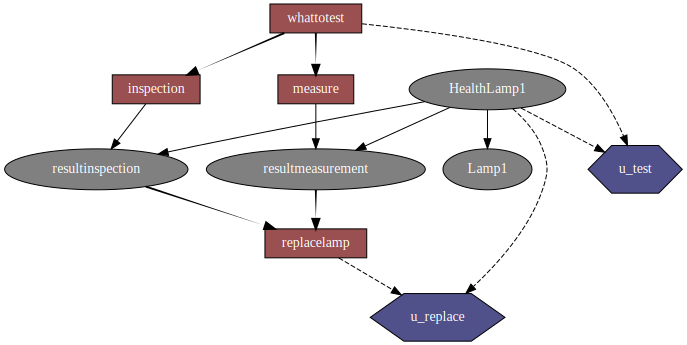

In [44]:
print(diag)
gnb.showInfluenceDiagram(diag, size=60)

opmerkingen:

vervangingsbesluit:
- Input voor vervangingsbesluit lijken mij de resultaten, in je plaatje is replacelamp verbonden met het testbesluit
- In literatuur van TNO is de stelling dat als de health minder dan 0.5 zou worden er sprake moet zijn van vervanging. Als we dit overnemen is alleen connectie met health nodig. Health wordt dan wel ook beinvloed door resultaten van de meting en inspectie.

2 typen observaties
- De visuele inspectie is een observatie met uitkomst of de lamp stuk is of niet. Het lijkt mij dan logisch dat hij verbonden is met Health. Er zullen ook observaties zijn die checken wat de status van het systeem is en dan is verbinding met de component zelf volgens mij logischer. Voorbeeld is dat je bij constateren dat lamp het niet doet de status van de switch wil weten zonder nu meteen te testen of de switch kapot is.

besluiten
- als whattotest het besluit neemt wat er getest moet worden waarom dan nog aparte besluiten modelleren voor de inspectie en measurement test?

# probabilities

In [45]:
# CPT tabllen om te vullen
gnb.flow.row(diag.cpt(Lamp1),
            diag.cpt(HealthLamp1),
            diag.cpt(resultinspection),
            diag.cpt(resultmeasurement),
            captions=[  "prior of lamp1",
                        "prior of HealthLamp1",
                        "prior of Resultmeasurement",
                        "prior of Resultinspection"
                      ])

In [49]:
# HealthLamp1
diag.cpt(HealthLamp1)[{"HealthLamp1":"ok"}]          = 0.95  
diag.cpt(HealthLamp1)[{"HealthLamp1":"broken"}]      = 0.05  

In [50]:
# CPT tabllen om te vullen
gnb.flow.row(diag.cpt(Lamp1),
            diag.cpt(HealthLamp1),
            diag.cpt(resultinspection),
            diag.cpt(resultmeasurement),
            captions=[  "prior of lamp1",
                        "prior of HealthLamp1",
                        "prior of Resultmeasurement",
                        "prior of Resultinspection"
                      ])

# utility function

In [53]:
diag.utility("u_test")[{"whattotest": "measure","HealthLamp1":"ok"}]            = 1 
diag.utility("u_test")[{"whattotest": "measure","HealthLamp1":"broken" }]       = 2
diag.utility("u_test")[{"whattotest": "inspect","HealthLamp1":"ok"}]            = 3
diag.utility("u_test")[{"whattotest": "inspect","HealthLamp1":"broken"}]        = 4
diag.utility("u_test")[{"whattotest": "none","HealthLamp1":"ok"}]               = 5
diag.utility("u_test")[{"whattotest": "none","HealthLamp1":"broken"}]          = 6



In [54]:
gnb.flow.row(diag.utility("u_test"),
            diag.utility("u_replace"),
           
            captions=[  "utility test",
                        "utility replace"
                      ])

In [ ]:
diag.saveBIFXML("iteratie1.xml")